# Chenyu Zhao
#### R version: 3.5.1

# MTH9879 Homework 2

Assigned: February 7, 2019.
Due: February 21, 2019 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Yassine Ghalane (yassine.ghalem@gmail.com), Victor Istrakov (stavka@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs.


### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$.

### Answer

Suppose the trader at $t=1$ is a seller. The payoff of market sell is $B-\beta_1 V$. The payoff of limit sell is $(A-\beta_1 V)P_{fill}=(A-\beta_1 V)\times(\frac{5}{22})^2$

$$
B-\beta_1 V \ge (A-\beta_1 V)^+P_{fill}
$$

gives $\beta_1\le \frac{4540}{5049}$

$$
(B-\beta_1 V)^+ \le (A-\beta_1 V)P_{fill}
$$

gives $\frac{4540}{5049}\le\beta_1\le\frac{12}{11}$

So $P^{MS}[1,1](0)=\frac{1135}{5049}$, $P^{LS}[1,1](0)=\frac{22}{459}$

And by symmetry, $P^{MB}[1,1](0)=\frac{1135}{5049}$, $P^{LB}[1,1](0)=\frac{22}{459}$

<font color=red>COMMENT: probability of do nothing?
</font>

### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

### Answer

When you submit the limit order, it will be placed at the end of the limit order queue on the market. If there is a relative large quantity available on the same side, then your order will be filled after all available quantity at this moment be filled. This will gives you a relative small chance for your limit order be filled. So you are more willing to submit the market order. After all, if your limit order cannot be filled at T, then it will give you nothing. 

On the other hand, if there is a relative large quantity available on the other side. Then in the following periods, there is more likely to have opposite market order submission. This will increase the chance for your limit order to be filled in the future. So you are more willing to submit a limit order.

So your decision depends on the order book, hence the optimal market/limit order decision depends on quantity available on both sides of the order book in the Parlour model.

### Set up R-environment

In [10]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

### Answer
(a)
$$
1\% \times \sqrt{1\%}\times 37.5=0.0375
$$

So $\lambda_u$ should be 3.75¢ per share.

(b)

*market* | **h** | **f** | **r** 
-----|-----:|-------:| ---- |
BZX |0.5¢|+0.32¢ | +0.30¢ |
BYX |0.5¢ | -0.03¢ | -0.03¢ |


(c)

It should be daily volume times total duration, which is 1%.

So for BZX, 105,000, and for BYX, 13,000.

(d)

$\sigma Z-\frac{1}{2}\sigma^2$ follows $N(-\frac{1}{2}\sigma^2,\sigma^2)$

So its variance should be 

$$
var(\xi)=\bar{\xi}^2(e^{\sigma^2}-1)e^{-2\frac{1}{2}\sigma^2+\sigma^2}=\bar{\xi}^2(e^{0.25}-1)
$$

So its standard deviation should be $\bar{\xi}\sqrt{e^{0.25}-1}$


(e)

In [2]:
sigma<-0.5
h<-0.5/100
f1<- 0.3/100
r1<- 0.32/100
f2<- -0.03/100
r2<- -0.03/100
xi1<-105000
xi2<-13000
lambdau<-3.75/100

Inv<-function(x,xi){
    qlnorm(x,meanlog=-1/2*sigma*sigma+log(xi),sdlog=sigma)
}

LplusQ1<-Inv((2*h+f1+r1)/(lambdau+h+r1),xi1)
LplusQ2<-Inv((2*h+f2+r2)/(lambdau+h+r2),xi2)

print(LplusQ1)
print(LplusQ2)

[1] 76887.36
[1] 7834.038


(f)

In [3]:
BZXratio=LplusQ1/10500000
BZXquote=mean(c(753,400,400,300,200,300,300,200,500,453))
BZXrealratio=BZXquote/219014
print("BZX calculated ratio and real ratio: ")
print(BZXratio)
print(BZXrealratio)

BYXratio=LplusQ2/1300000
BYXquote=mean(c(100,200,300,400,300,200,100,100,353,100))
BYXrealratio=BYXquote/71377
print("BYX calculated ratio and real ratio: ")
print(BYXratio)
print(BYXrealratio)

[1] "BZX calculated ratio and real ratio: "
[1] 0.007322606
[1] 0.001737788
[1] "BYX calculated ratio and real ratio: "
[1] 0.006026183
[1] 0.003016378


We can see they are at the same magnitude.

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu^2 \,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

### Answer
(a) & (b)

In [24]:
logging<-T

alpha <- 1
mu <- 10
delta <- 1/5
avgBookShapes<-as.data.frame(matrix(0,nrow=41,ncol=4))

initializeBook5()

numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents

ls<-0
lb<-0

for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
  if(eventLog[count,1]=="LS")ls<-ls+1
  if(eventLog[count,1]=="LB")lb<-lb+1 
}


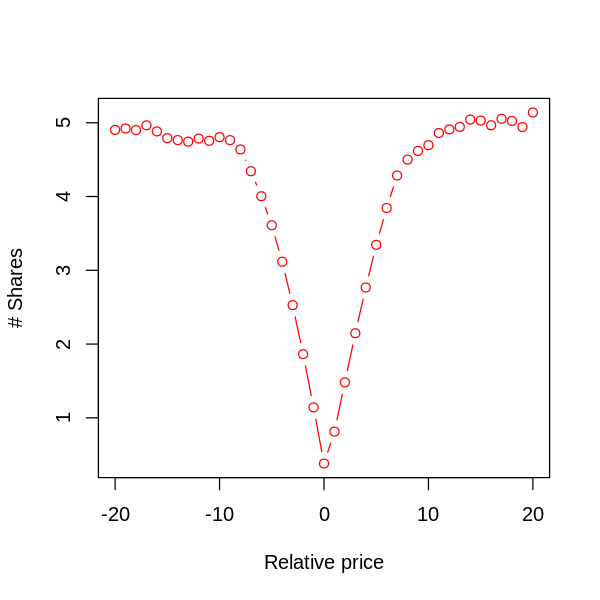

In [26]:
library(repr)
options(repr.plot.width=5,repr.plot.height=5)
plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

(c)

In [67]:
PL<-(ls+lb)/numEvents/60
print("PL:")
print(PL)

[1] "PL:"
[1] 0.008332667


(d)

$\sigma_{GO}^2=0.083/(P_L\times 2)=4.98$

$\tilde \Delta_{GO}=\sqrt{\frac{\sigma^2}{2\,\delta}}=3.52$

<font color="red">Comment: delta should be around 5 -2pt</font>

(e)

$\sigma_{DA}^2=\frac{\mu^2 \delta}{\alpha^2}=20$

$\tilde \Delta_{DA}=\sqrt{\frac{\sigma^2}{2\,\delta}}=\sqrt{50}=7.07$

(f) & (g)

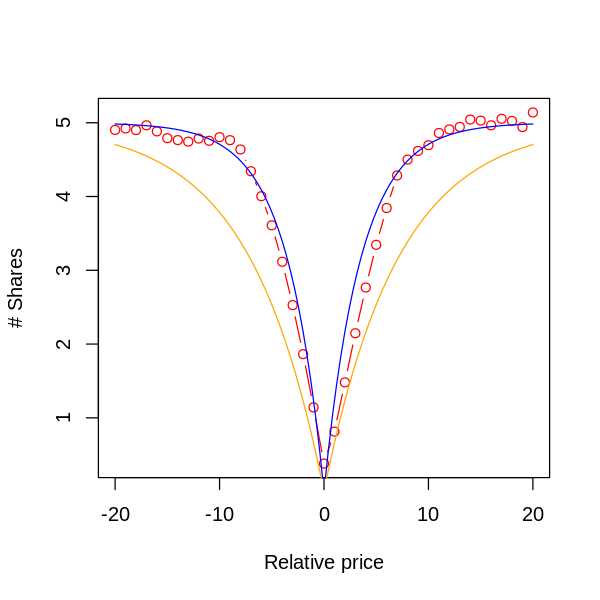

In [69]:
rho<-function(x,delhat){
    alpha/delta*(1-exp(-abs(x)/delhat))
}
plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red" ,type="b")
curve(rho(x,3.52),col="blue",add=TRUE)
curve(rho(x,7.07),col="orange",add=TRUE)

### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

### Answer

(a)

Wlog, we consider buy orders. The orders which price is smaller than ask price are limit orders. And the rest should be market orders.

$$
\frac{limit}{market}=\frac{F(s)}{1-F(s)}=\frac{F(s)}{F(-s)}
$$

where F(.) is cdf of student-t distribution with freedom of $\frac{1}{2}$

(b)

The ratio of limit orders to market orders is increasing with spread. So when the spread is tight, there will be more market orders, which will widen the spread. And when the spread is wide, there will be more limit orders, which will tighten the spread. So this should imply a faster spread revert than the ZI model, in which the arrival of limit and market orders are independ of spread.

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>